# EDA

In [5]:
import pandas as pd
import numpy as np
from collections import Counter
_
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
# Set style and plot size
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [15, 6]
_
import warnings
warnings.filterwarnings("ignore")

In [7]:
%run 00_preprocessing_fuctions.ipynb

In [8]:
# Load in dataframes
df = pd.read_csv('processed_datasets/my_books_PROCESSED.csv')  # Main dataset
_
print(df.shape, '\n')
df.sample(7)

(5670, 12) 



,id,genre,original_text,filtered_text,neg,neu,pos,compound,text_sentiment,verb_count,adj_count,noun_count
571,921,Romance,The Fault in Our Stars meets Eleanor and Park ...,fault star meet eleanor park exhilarating hear...,0.229,0.538,0.232,-0.3612,NEGATIVE,22,27,53
2540,4223,Fantasy,"Alluring romance, heart-stopping danger, and s...",alluring heart stopping danger sinister intrig...,0.381,0.445,0.174,-0.9818,NEGATIVE,13,18,43
2022,3271,Fantasy,"Unbeknownst to mortals, a power struggle is un...",unbeknownst mortal power struggle unfolding wo...,0.313,0.575,0.112,-0.9603,NEGATIVE,12,23,35
1827,2969,Fantasy,When a murdered woman is found in the city of ...,murdered found city beszel somewhere edge euro...,0.292,0.596,0.111,-0.9828,NEGATIVE,22,28,49
3943,6723,Romance,When Rajaa Alsanea boldly chose to open up the...,rajaa alsanea boldly chose open hidden world s...,0.073,0.821,0.106,0.4767,NEUTRAL,8,15,26
1211,1940,Thriller,"Frank, no ordinary sixteen-year-old, lives wit...",frank ordinary sixteen year old life father ou...,0.253,0.645,0.103,-0.9554,NEGATIVE,11,23,44
4135,7058,Romance,"Darkly handsome and rich beyond imagining, the...",darkly handsome rich beyond imagining bold eng...,0.271,0.409,0.320,0.6862,POSITIVE,12,14,20


In [9]:
df.describe()

,id,neg,neu,pos,compound,verb_count,adj_count,noun_count
count,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000
mean,4819.983422,0.187246,0.619680,0.193077,-0.016163,14.346208,16.709347,37.346208
std,2890.057605,0.103304,0.110946,0.098680,0.798732,7.656700,8.914927,20.189914
min,1.000000,0.000000,0.241000,0.000000,-0.997000,0.000000,0.000000,2.000000
25%,2289.500000,0.113000,0.549000,0.125000,-0.875000,9.000000,11.000000,25.000000
50%,4789.500000,0.185000,0.613000,0.186000,-0.025800,13.000000,15.000000,34.000000
75%,7271.750000,0.255750,0.683000,0.252000,0.865800,19.000000,21.000000,46.000000
max,9996.000000,0.660000,1.000000,0.631000,0.998600,72.000000,106.000000,475.000000


### Text analysis

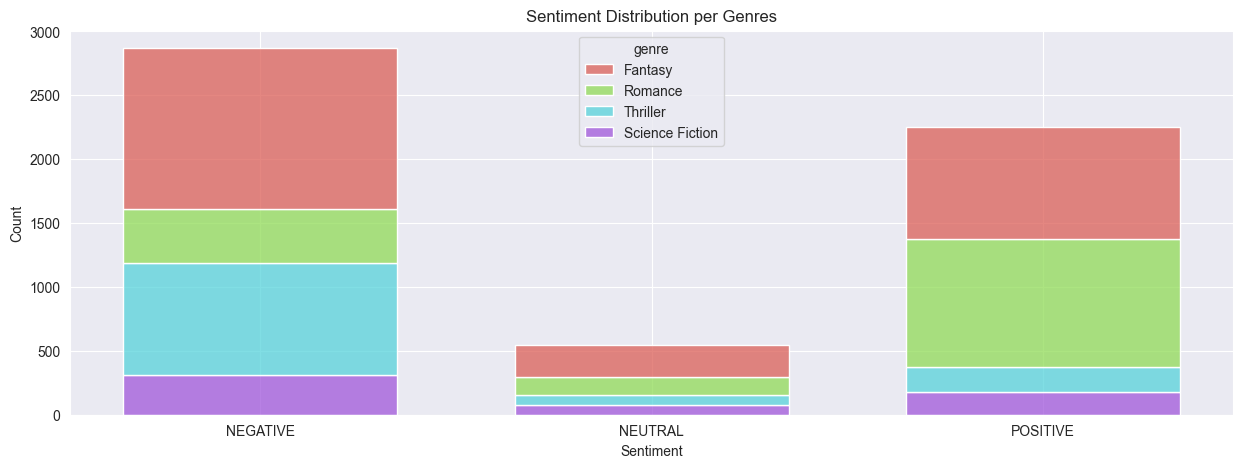

In [10]:
# Genre sentiment distrubtions ——
plt.figure(figsize=(15, 5))
plt.title('Sentiment Distribution per Genres')
sns.histplot(data=df, x='text_sentiment', hue='genre', palette='hls', multiple='stack', shrink=0.7)
plt.xlabel('Sentiment')
plt.show()

In [13]:
# Average word count of original text for each genre
df['word_count'] = df['original_text'].apply(lambda x: clean_text(x, True))
_
avg_word_count = df.groupby(['genre']).agg(avg_word_count=('word_count', 'mean')).reset_index()
avg_word_count                                           

,genre,avg_word_count
0,Fantasy,141.520067
1,Romance,166.405371
2,Science Fiction,147.752688
3,Thriller,163.306228


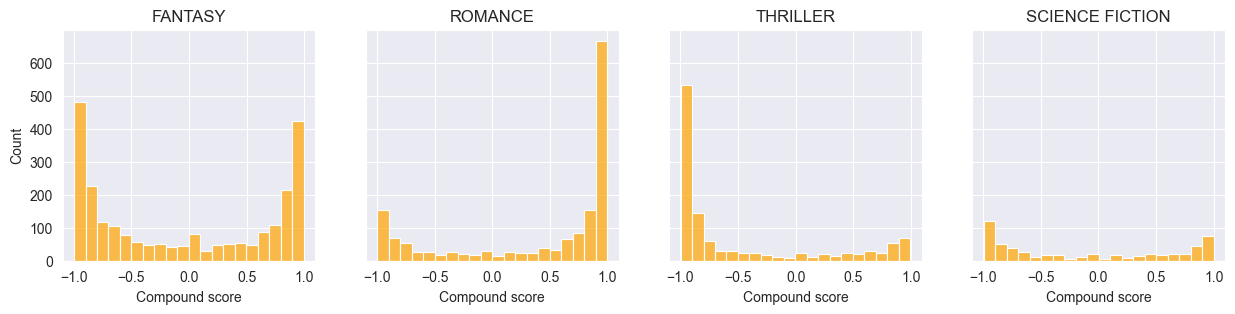

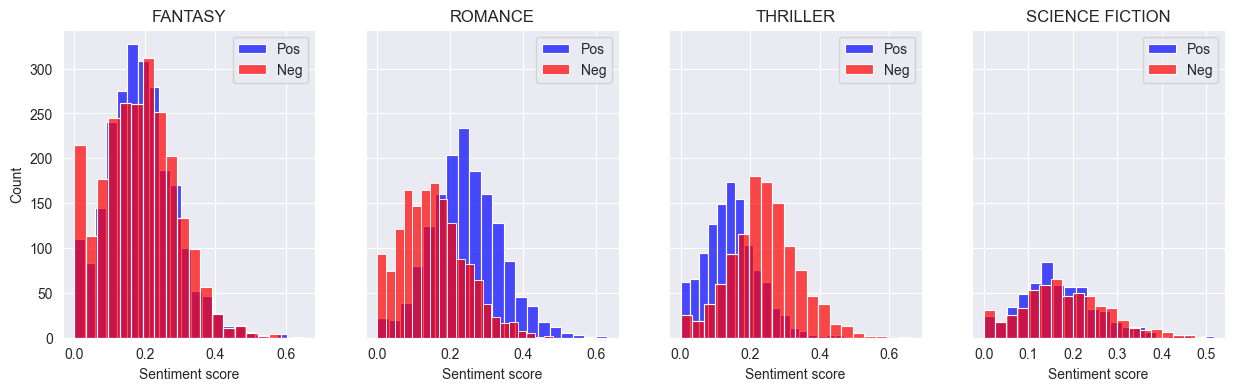

In [14]:
# Compound score distribution per genre
unique_genres = df['genre'].unique()

f, axs = plt.subplots(1, len(unique_genres), figsize=(15, 3), sharey=True)
for i, genre in enumerate(unique_genres):
    sns.histplot(data=df[df['genre'] == genre], bins=20, x='compound', color='orange', alpha=0.7, ax=axs[i])
    axs[i].set_title(f"{genre.upper()}")
    axs[i].set_xlabel(f"Compound score")

plt.show()

# Positive / negative scores per genre
f, axs = plt.subplots(1, len(unique_genres), figsize=(15, 4), sharey=True)
for i, genre in enumerate(unique_genres):
    sns.histplot(data=df[df['genre'] == genre], bins=20, x='pos', color='blue', alpha=0.7, label='Pos', ax=axs[i])
    sns.histplot(data=df[df['genre'] == genre], bins=20, x='neg', color='red', alpha=0.7, label='Neg', ax=axs[i])
    axs[i].set_title(f"{genre.upper()}")
    axs[i].set_xlabel(f"Sentiment score")
    axs[i].legend()

plt.show()

In [76]:
avg_sent_scores = df.groupby(['genre']).agg(pos_avg=('pos', 'mean'), neg_avg=('neg', 'mean'), comp_avg=('compound', 'mean')).reset_index()
avg_sent_scores

,genre,pos_avg,neg_avg,comp_avg
0,Fantasy,0.188492,0.184376,-0.044494
1,Romance,0.242795,0.153160,0.403655
2,Science Fiction,0.168950,0.182262,-0.106877
3,Thriller,0.146942,0.241706,-0.481742


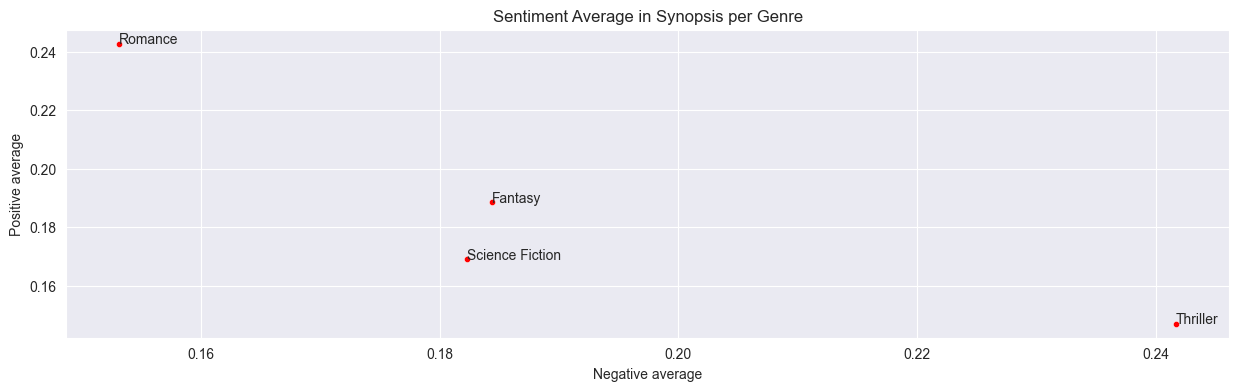

In [77]:
# Plot average positive / negative scores on a scatterplot
plt.figure(figsize=(15, 4))
plt.title(f"Sentiment Average in Synopsis per Genre")
ax = sns.scatterplot(data=avg_sent_scores, x='neg_avg', y='pos_avg', color='red', s=20)
for i, text in enumerate(avg_sent_scores['genre']):
    ax.text(avg_sent_scores['neg_avg'][i], avg_sent_scores['pos_avg'][i], text, ha="left", va='baseline')

plt.xlabel(f"Negative average")
plt.ylabel(f"Positive average")
plt.show()

There's a significant difference in the average scores between genres. `Thriller` has the highest negative average and the lowest positive average by A LOT, which makes sense when you think about it; these books usually involve death, crime, or supernatual elements which could be considered negative in nature. Looking at this plot, VADER's sentiment analysis supplies evidence to support this theory.

In [78]:
verb_adj_avg = df.groupby(['genre']).agg(verb_count_avg=('verb_count', 'mean'), adj_count_avg=('adj_count', 'mean')).reset_index()
verb_adj_avg

,genre,verb_count_avg,adj_count_avg
0,Fantasy,13.122492,15.562291
1,Romance,15.835038,17.629795
2,Science Fiction,13.356631,16.528674
3,Thriller,15.341696,17.924740


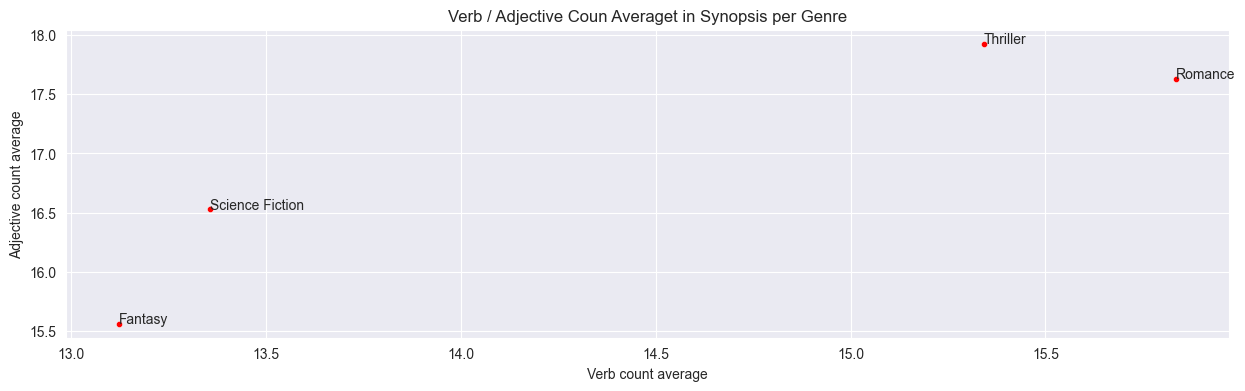

In [79]:
# Plot average verb / adjective counts on a scatterplot
plt.figure(figsize=(15, 4))
plt.title(f"Verb / Adjective Coun Averaget in Synopsis per Genre")
ax = sns.scatterplot(data=verb_adj_avg, x='verb_count_avg', y='adj_count_avg', color='red', s=20)
for i, text in enumerate(verb_adj_avg['genre']):
    ax.text(verb_adj_avg['verb_count_avg'][i], verb_adj_avg['adj_count_avg'][i], text, ha="left", va='baseline')

plt.xlabel(f"Verb count average")
plt.ylabel(f"Adjective count average")
plt.show()

In [80]:
# Noun average per genre
df.groupby(['genre']).agg(avg_noun_count=('noun_count', 'mean')).reset_index()

,genre,avg_noun_count
0,Fantasy,34.057274
1,Romance,39.718031
2,Science Fiction,36.725806
3,Thriller,41.242215


In [81]:
# Word cloud analysis
genre_df = pd.read_csv('processed_datasets/my_genre_corpus.csv')
# genre_df = pd.read_csv('binary_datasets/binary_genre_text.csv')
genre_df

,genre,text
0,Fantasy,could survive wild every make sure live see mo...
1,Romance,three thing absolutely positive first edward v...
2,Thriller,world renowned harvard symbologist robert lang...
3,Science Fiction,year come gone george orwell prophetic nightma...


### Word frequency

In [82]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black")

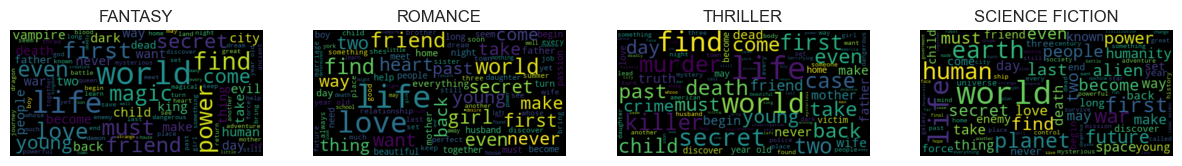

In [83]:
for i, genre in enumerate(genre_df['genre']):
    wordcloud.generate(genre_df['text'][i])
    plt.subplot(1, len(genre_df['genre'].unique()), i+1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"{genre.upper()}")
    plt.axis("off")

plt.show()

In [84]:
# Common words across all genres
common_words = []
word_genre_dict = {'genre': [], 'word': [], 'count': []}

for i, genre in enumerate(genre_df['genre']):
    # Get top 5 most common words per genre
    word_counts = Counter(genre_df['text'][i].split(' ')).most_common(5)
    for word, count in word_counts:
        if word not in common_words:
            common_words.append(word)

for word in common_words:
    for i, genre in enumerate(genre_df['genre']):
        word_genre_dict['genre'].append(genre)
        word_genre_dict['word'].append(word)
        # Get count for current word
        word_count = genre_df[genre_df['genre'] == genre]['text'][i].split(' ').count(word)
        word_genre_dict['count'].append(word_count) 

In [85]:
# Created a new dataframe to store all values adjacently for ease of plotting
comm_words_df = pd.DataFrame(word_genre_dict)
_
comm_words_df.head()

,genre,word,count
0,Fantasy,world,1252
1,Romance,world,531
2,Thriller,world,463
3,Science Fiction,world,345
4,Fantasy,life,1101


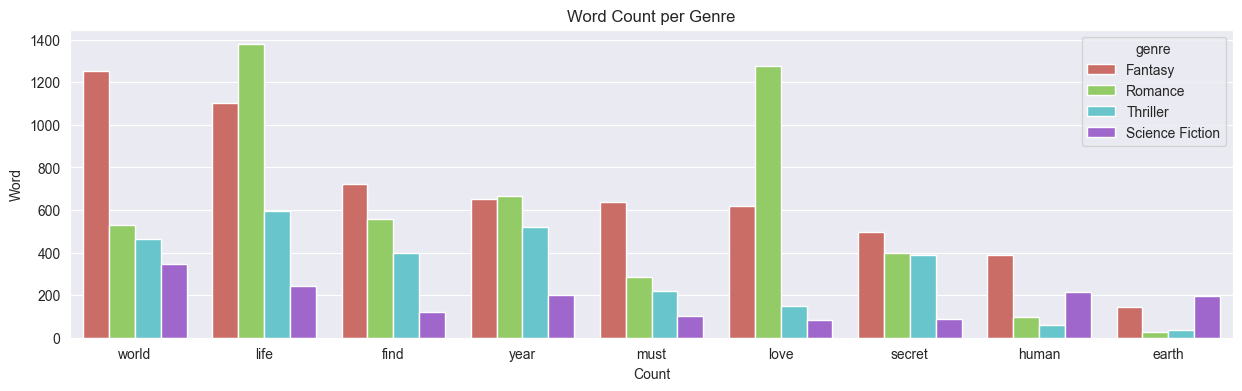

In [86]:
plt.figure(figsize=(15, 4))
sns.barplot(data=comm_words_df, x='word', y='count', hue='genre', palette='hls')
plt.title(f"Word Count per Genre")
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()